(22L,)


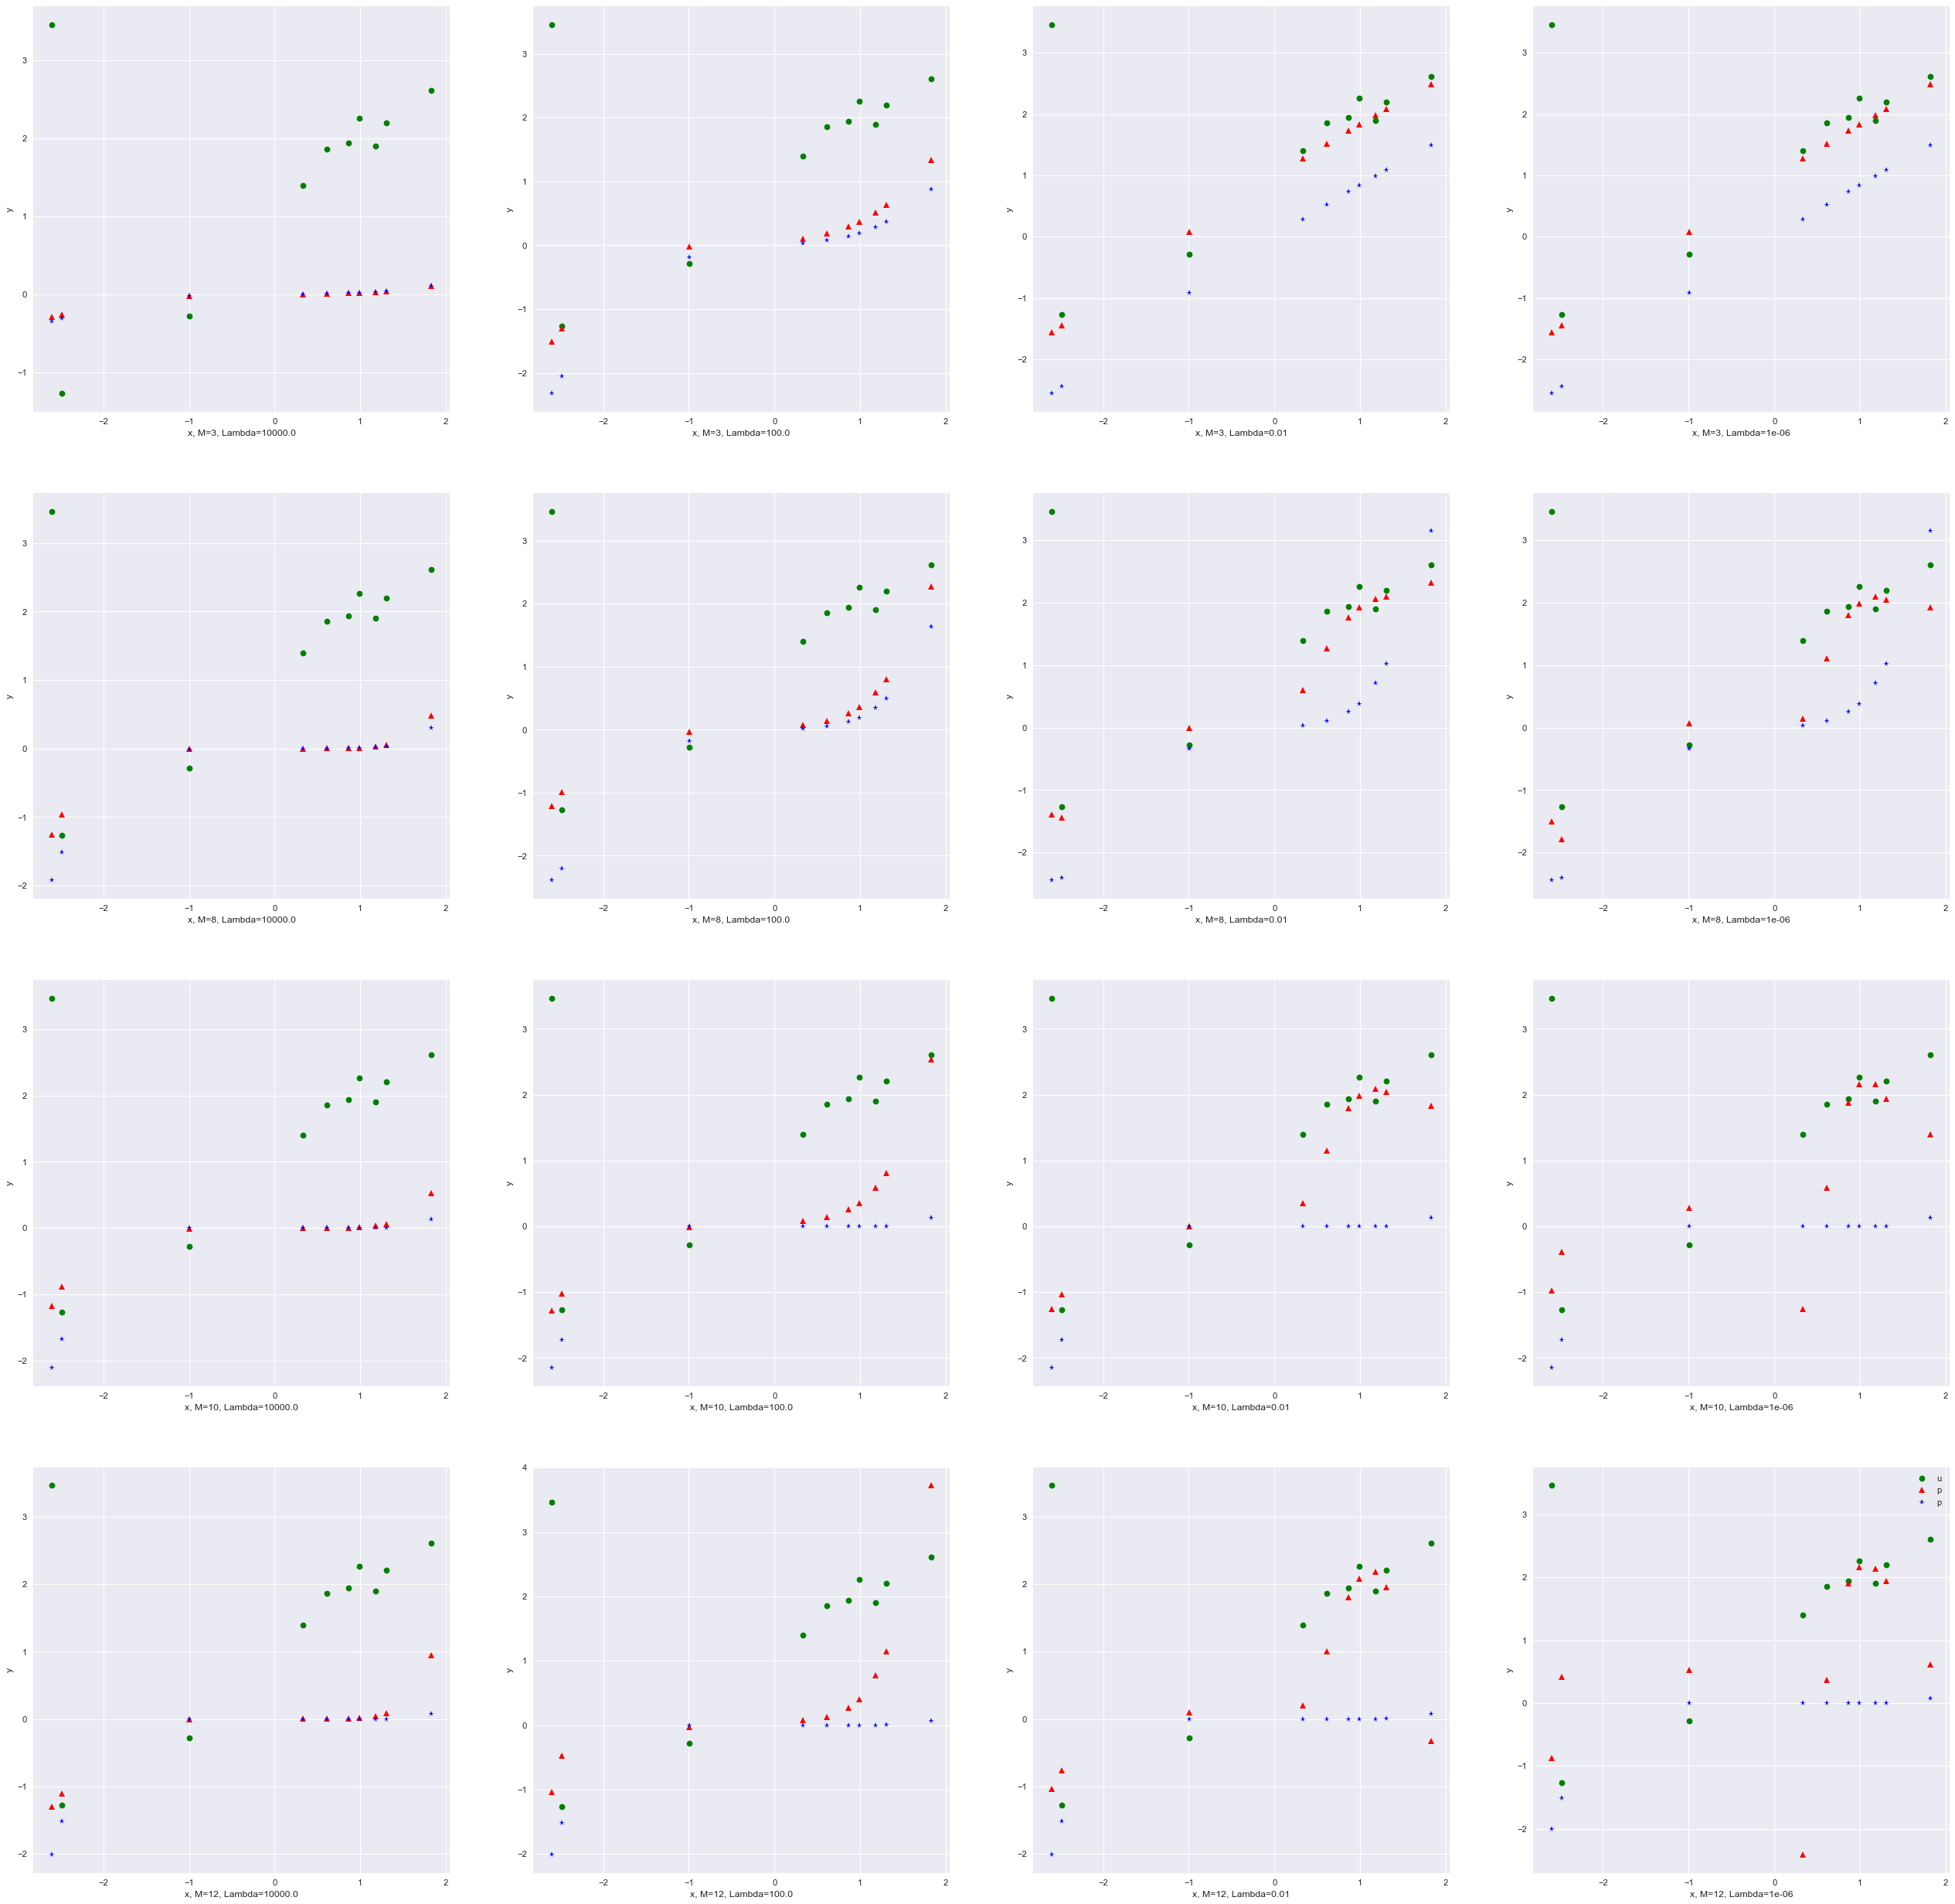

In [19]:
%matplotlib inline
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import linear_model
import pdb
import random
import pylab as pl

# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values

def getData(name):
    data = pl.loadtxt(name)
    # Returns column matrices
    X = data[0:1]
    Y = data[1:2]
    return X[0], Y[0]

def regressAData():
    return getData('regressA_train.txt')

def regressBData():
    return getData('regressB_train.txt')

def validateData():
    return getData('regress_validate.txt')

X_A, Y_A = regressAData()
X_B, Y_B = regressBData()
X_val, Y_val = validateData()
print X_val.shape

def polynomial_basis(x, M):
    poly = np.arange(M+1)
    X = np.power(np.array([x]).T, poly)
    return X

# These weights are calculated using the closed form
def weights(X, Y, lambd):
    features = X.shape[1]
    theta = np.dot(np.linalg.inv(lambd*np.identity(features) + (np.dot(X.T, X))), np.dot(X.T, Y))
    return theta

def l2_weights(X, Y, lambd):
    clf = linear_model.Ridge(lambd, solver='lsqr')
    clf.fit(X,Y)
    return clf.coef_

def predict(x, Y, M, theta):
    X = polynomial_basis(x, M)
    #theta = weights(X, Y, M, lambd)
    Y_hat = np.dot(X, theta)
    return Y_hat

# Use Regress A as Training set and B as Test data set
M = np.array([3,8,10,12])
lambd = np.array([1e4,1e2,1e-2,1e-6])
plt.figure(1,figsize=(40, 40), dpi=80)
for i in range (M.shape[0]):
    for j in range (lambd.shape[0]):
        theta = weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        plt.subplot(M.shape[0], lambd.shape[0], M.shape[0]*i+j+1)
        theta_l2 = l2_weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
        plt.plot(X_B,Y_B,'go', label='Y true val')
        plt.plot(X_B, predict(X_B, Y_B, M[i], theta), 'r^', label='Y predicted val')
        plt.plot(X_B, predict(X_B, Y_B, M[i], theta_l2), 'b*', label='Y predicted val')
        
        xlabel = 'x, M='+str(M[i])+ ', Lambda=' +str(lambd[j])
        plt.xlabel(xlabel)
        plt.ylabel('y')
plt.legend('upper left')
plt.show()
        

AttributeError: 'DataFrame' object has no attribute 'DataFrame'

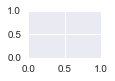

In [18]:
theta = weights(polynomial_basis(X_A, M[i]), Y_A, lambd[j])
plt.subplot(M.shape[0], lambd.shape[0], M.shape[0]*i+j+1)

df = pd.DataFrame()
df['x'] = X_B
df['y_true'] = Y_B
df['y_pred'] = predict(X_B, Y_B, 10, theta)

sns.lmplot(x='x', y='y_true', data=df)
#sns.lmplot(x=X_B, , 'r^', label='Y predicted val')

